In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
dataDir = "/Users/avnikothari/Desktop/cse258/data/"
path = dataDir + "hotel_bookings_clean.csv"
df = pd.read_csv(path)

In [74]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86935,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
86936,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
86937,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
86938,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Number of customers 
City Hotel 53418 
Percent cancelations 30.0 %
Resort Hotel 33522
Percent cancelations 23.7 %


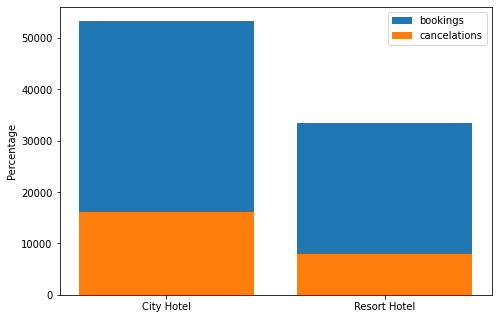

In [99]:
hotel_counts = df['hotel'].value_counts()

subset_df = df[df["is_canceled"] == 1]
hotel_counts_subset = subset_df['hotel'].value_counts()

x_values = ['City Hotel', 'Resort Hotel']
y_values_1 = hotel_counts.to_numpy()
y_values_2 = hotel_counts_subset.to_numpy()

fig = plt.figure()
plot = fig.add_axes([0, 0, 1, 1])
plot.bar(x_values,y_values_1, label = 'bookings')
plot.bar(x_values,y_values_2, label = 'cancelations')
plt.ylabel('Percentage')

plt.legend()

print("Number of customers ")
print(f'City Hotel {y_values_1[0]} ')
print(f'Percent cancelations {round((y_values_2[0]/y_values_1[0]),3) * 100} %' )
print(f'Resort Hotel {y_values_1[1]}')
print(f'Percent cancelations {round((y_values_2[1]/y_values_1[1]),3) * 100} %' )


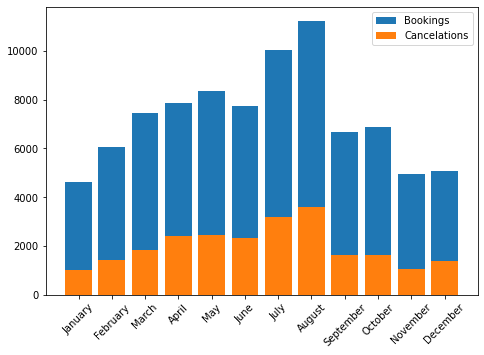

In [87]:
month_counts = df['arrival_date_month'].value_counts()
month_counts_dict = dict(month_counts)

subset_df = df[df["is_canceled"] == 1]
month_counts_subset = subset_df['arrival_date_month'].value_counts()
month_counts_dict_subset = dict(month_counts_subset)


x_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y_values_1 = [month_counts_dict[month] for month in x_values]
y_values_2 = [month_counts_dict_subset[month] for month in x_values]

fig = plt.figure()
plot = fig.add_axes([0, 0, 1, 1])
plot.bar(x_values,y_values_1, align='center', width=.8, label = 'Bookings')
plot.bar(x_values,y_values_2, align='center', width=.8, label = 'Cancelations')

plt.xticks(rotation = 45)
plt.legend()
plt.show()

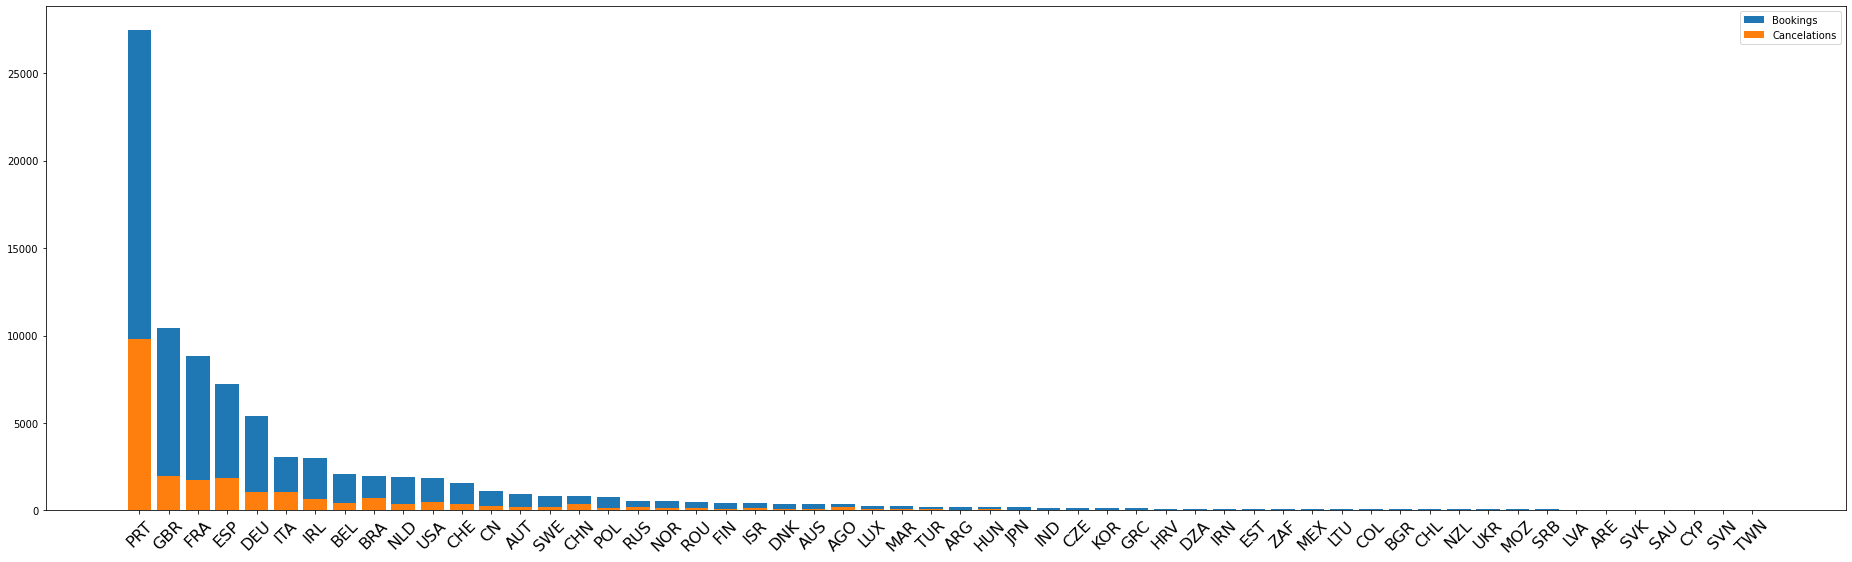

Shows countries that have more than 40 bookings


In [132]:
country_counts = df['country'].value_counts()
country_counts_dict = dict(country_counts)

subset_df = df[df["is_canceled"] == 1]
country_counts_subset = subset_df['country'].value_counts()
country_counts_dict_subset = dict(country_counts_subset)


x_values = country_counts_dict.keys()
y_values_1 = [country_counts_dict[country] for country in x_values]

zipped_vals = list(zip(x_values, y_values_1))
filtered_vals = list(filter(lambda tup: tup[1] > 40, zipped_vals))

x_values = [tup[0] for tup in filtered_vals]
y_values_1 = [tup[1] for tup in filtered_vals]

y_values_2 = [country_counts_dict_subset.get(country, 0) for country in x_values]



fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(7)
plot = fig.add_axes([0, 0, 1, 1])
plot.bar(x_values,y_values_1, align='center', width=.8, label = 'Bookings')
plot.bar(x_values,y_values_2, align='center', width=.8, label = 'Cancelations')

plt.xticks(rotation = 45, fontsize = 16)

plt.legend()
plt.show()

print("Shows countries that have more than 40 bookings")

In [137]:
country_counts = df['country'].value_counts()
country_counts_dict = dict(country_counts)

subset_df = df[df["is_canceled"] == 1]
country_counts_subset = subset_df['country'].value_counts()
country_counts_dict_subset = dict(country_counts_subset)


x_values = country_counts_dict.keys()
y_values_1 = [country_counts_dict[country] for country in x_values]

zipped_vals = list(zip(x_values, y_values_1))
filtered_vals = list(filter(lambda tup: tup[1] > 40, zipped_vals))

x_values = [tup[0] for tup in filtered_vals]
y_values_1 = [tup[1] for tup in filtered_vals]

y_values_2 = [country_counts_dict_subset.get(country, 0) for country in x_values]

zipped_all_vals = list(zip(x_values, y_values_1, y_values_2))
percent_cancelations = list(map(lambda tup: (tup[0], (tup[2]/tup[1]) * 100, zipped_all_vals))
                      



# fig = plt.figure()
# fig.set_figwidth(25)
# fig.set_figheight(7)
# plot = fig.add_axes([0, 0, 1, 1])
# plot.bar(x_values,y_values_1, align='center', width=.8, label = 'Bookings')
# plot.bar(x_values,y_values_2, align='center', width=.8, label = 'Cancelations')

# plt.xticks(rotation = 45, fontsize = 16)

# plt.legend()
# plt.show()

# print("Shows countries that have more than 40 bookings")

[35.65521512623411, 19.02616697019074, 19.61072762249632, 25.675675675675674, 19.547057731576018, 35.06196999347684, 22.148541114058357, 19.7501201345507, 36.44110275689223, 18.315018315018314, 24.48, 24.45859872611465, 20.585544373284538, 17.95142555438226, 21.14695340501792, 48.03921568627451, 21.437908496732025, 39.57219251336899, 28.155339805825243, 25.76419213973799, 15.165876777251185, 33.002481389578165, 23.697916666666664, 24.33862433862434, 56.4327485380117, 39.31297709923664, 44.827586206896555, 45.539906103286384, 25.12315270935961, 32.17821782178218, 13.661202185792352, 23.776223776223777, 24.264705882352942, 36.134453781512605, 28.205128205128204, 25.274725274725274, 25.609756097560975, 27.500000000000004, 22.78481012658228, 37.17948717948718, 12.162162162162163, 9.58904109589041, 33.33333333333333, 13.23529411764706, 24.615384615384617, 6.349206349206349, 32.25806451612903, 30.357142857142854, 5.555555555555555, 15.686274509803921, 85.41666666666666, 20.833333333333336, 6